In [ ]:
#MODELO DOS K VIZINHOS MAIS PRÓXIMOS
#Método mais simples e facil tb intuitivo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
df= pd.read_csv('/content/Classified Data', index_col=0) #index_col= indica a coluna 0 como indice
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [ ]:
df.info() #mil entradas feitas aleatoriamente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [ ]:
len(df.columns) #numero de colunas

11

Esse modelo é intuitivo, onde o pc faz calculo de distancias entre parametro,olhando os pontos que contem uma classe que esta mais perto do novo ponto
essa métrica de distância, sobre diferentes contextos de dados. Pode utilizar dados que não tem mesma escala, onde algumas var tem mais peso que as outras, relevante para que os dados sejam normalizados
a normalização de dados é fundamental, sem normalização ele só ira considerar os mais relevantes

In [ ]:
#biblioteca para normalização de dados-metodos de padronização
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [ ]:
#vamos treinar o modelo baseado para padronizações futuras, para ele identificar as estrategias de padronizar os param
scaler.fit(df.drop('TARGET CLASS', axis =1))
#classificar apenas os parâmetros, apagando a coluna target class 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#tira media e desvio padrão para cada ponto
df_normalizado = scaler.transform(df.drop('TARGET CLASS', axis =1))
df_normalizado

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [ ]:
#definir um df só de parametros para dividir em treino e teste
#df_norm é apenas um array, então ele vai virar um df de pandas
df_param = pd.DataFrame(df_normalizado, columns=df.columns[:-1])

In [ ]:
df_param.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
#divisão treino teste 
from sklearn.model_selection import  train_test_split

In [ ]:
#x=df_param, y=target class 
X_train, X_test,y_train,y_test = train_test_split(df_param,df['TARGET CLASS'], test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#passe o numero de vizinhos
knn= KNeighborsClassifier(n_neighbors = 1)

In [ ]:
#fitar o modelo com dados de treino e teste
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
#Tirando predições dele 
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,pred))
#dados do modelo, pode mudar o numero de vizinhos
#mt grande- custo operacional
#facil de fitar mais pesado de tirar predições dele

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       154
           1       0.92      0.91      0.91       146

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
print(confusion_matrix(y_test,pred))

[[142  12]
 [ 13 133]]


In [ ]:
#lista de taxa de erro
error_rate= []
#i combinação de diferentes de valores de k, 
#como que se da o erro do modelo para essas combinações 
for i in range(1,40):
  knn= KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  pred = knn.predict(X_test)
  error_rate.append(np.mean(pred!=y_test))
  #para cada vez da iteração ele vai salvar na lista a media de erros

Text(0, 0.5, 'Taxa de erro')

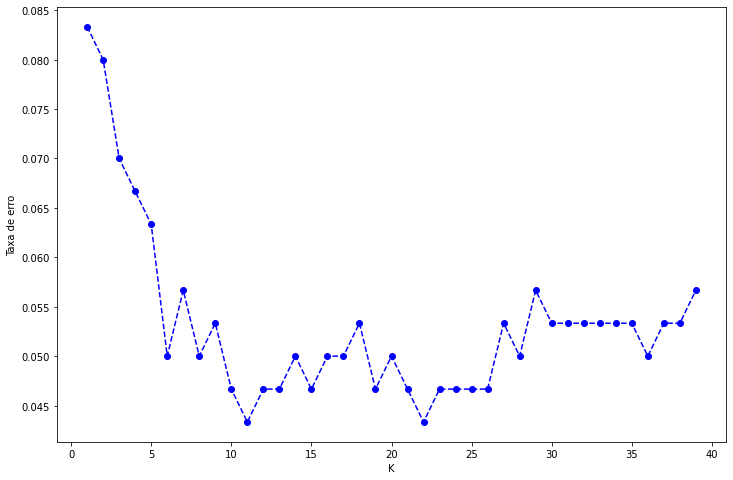

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), error_rate,color='blue', marker='o', linestyle='dashed')
plt.xlabel('K')
plt.ylabel('Taxa de erro')
#20 ou 25 ele converge para o minimo
#não conseguimos otimizar esse modelo com o aumento do valor de K
#k= 100 ele tem que fazer 100 calculos de distância 


In [ ]:
#para k=20 
knn= KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
#precisão do modelo com 95%
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       154
           1       0.95      0.95      0.95       146

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

